In [40]:
import pandas as pd

fish_df = pd.read_csv('fish.csv')
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000
...,...,...,...,...,...,...,...
1154,Roach,537.551874,22.516935,36.898476,37.200493,15.748422,3.638007
1155,Perch,352.695899,35.261218,43.805681,21.891690,15.558469,5.494283
1156,Smelt,551.789099,36.884831,6.326354,38.047953,7.281541,5.394140
1157,Pike,773.045667,40.825037,39.951668,42.238640,8.335025,3.420791


In [41]:
fish_df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [42]:
fish_df.duplicated().sum()

0

In [43]:
fish_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,1159.0,433.256297,292.592538,0.000000,197.441494,387.964688,620.400609,1650.000000
Length1,1159.0,26.585963,9.653539,0.737550,19.840007,26.842057,33.078214,59.271857
Length2,1159.0,28.301102,10.527909,0.468101,20.866877,28.146877,35.000000,63.400000
Length3,1159.0,31.341458,11.495857,1.044218,23.335414,31.100000,39.092351,73.005653
Height,1159.0,9.029103,4.145851,0.000934,6.215684,8.741288,11.949914,23.170925
Width,1159.0,4.404440,1.637072,0.115173,3.294350,4.368000,5.531383,9.807894


In [44]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  1159 non-null   object 
 1   Weight   1159 non-null   float64
 2   Length1  1159 non-null   float64
 3   Length2  1159 non-null   float64
 4   Length3  1159 non-null   float64
 5   Height   1159 non-null   float64
 6   Width    1159 non-null   float64
dtypes: float64(6), object(1)
memory usage: 63.5+ KB


In [45]:
fish_df.Species.value_counts().count()

7

<Axes: xlabel='Species'>

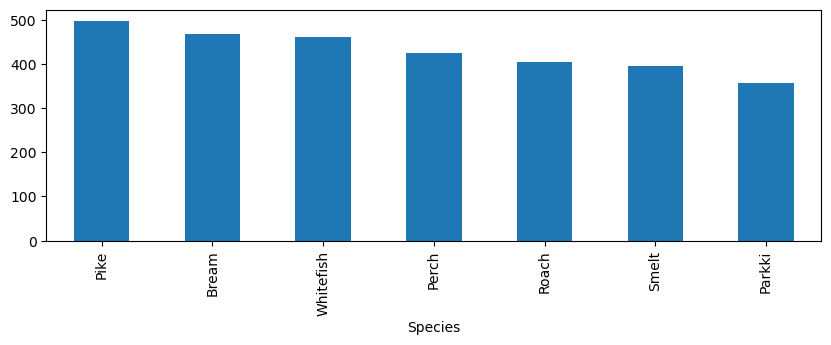

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
fish_df.groupby('Species')['Weight'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Species', ylabel='Width'>

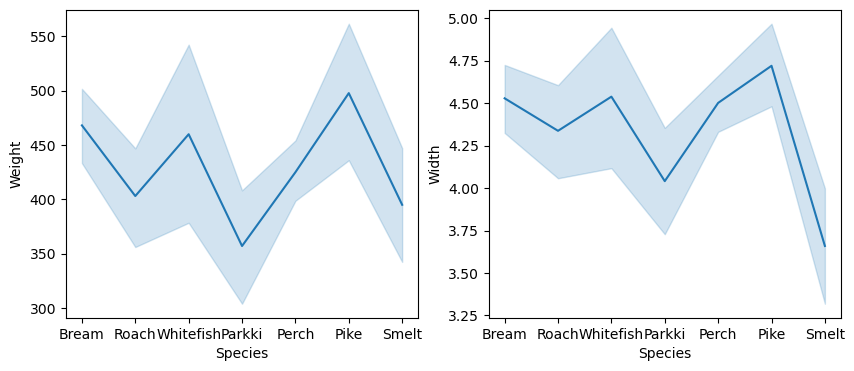

In [47]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(x=fish_df['Species'], y=fish_df['Weight'], ax=ax[0])
sns.lineplot(x=fish_df['Species'], y=fish_df['Width'], ax=ax[1])

그래프에 나타난 하늘색 영역은 일반적으로 '신뢰 구간(confidence interval)' 또는 '오차 막대(error bars)'를 나타낼 때 사용됩니다. 이는 그래프에 표현된 데이터 포인트의 불확실성이나 변동성을 시각적으로 나타내는 방법으로, 데이터의 추정값 주변에 어느 정도의 변동이 있을 수 있는지를 보여줍니다.

보통 이런 그래프는 평균값과 함께 평균의 표준편차나 표준오차를 나타내기 위해 사용되며, 데이터가 얼마나 퍼져 있는지(즉, 분산 정도)를 나타냅니다. 하늘색 영역이 넓으면 데이터의 분산이 크다는 것을 의미하고, 좁으면 데이터가 평균값 근처에 집중되어 있다는 것을 의미합니다.

이 그래프에서는 각 물고기 종류별로 무게와 너비의 평균값 주변에 있는 하늘색 영역을 통해 각 종류별 무게와 너비의 변동 범위를 나타내고 있는 것으로 보입니다.

In [48]:
from sklearn.preprocessing import StandardScaler

scaled_fish_df = pd.DataFrame()

scaler = StandardScaler()
columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
scaled_fish_df[columns] = scaler.fit_transform(fish_df[columns])

In [49]:
scaled_fish_df['Species'] = fish_df.Species
scaled_fish_df

,Weight,Length1,Length2,Length3,Height,Width,Species
0,-0.653943,-0.350900,-0.275682,-0.116741,0.601076,-0.234935,Bream
1,-0.489822,-0.267993,-0.190158,-0.012310,0.832733,-0.060402,Bream
2,-0.318862,-0.278356,-0.171153,-0.021013,0.808071,0.178236,Bream
3,-0.240220,-0.029635,0.066414,0.187848,0.893060,0.031203,Bream
4,-0.011134,-0.008909,0.066414,0.231361,0.824046,0.445842,Bream
...,...,...,...,...,...,...,...
1154,0.356607,-0.421688,0.816979,0.509885,1.621433,-0.468375,Roach
1155,-0.275452,0.899048,1.473348,-0.822370,1.575595,0.666014,Perch
1156,0.405287,1.067309,-2.088186,0.583635,-0.421703,0.604816,Smelt
1157,1.161807,1.475647,1.107114,0.948332,-0.167487,-0.601119,Pike


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
scaled_fish_df['Species'] = encoder.fit_transform(scaled_fish_df['Species'])
print(encoder.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [69]:
print(scaled_fish_df)


[[-0.65394306 -0.35089978 -0.27568191 -0.11674094  0.60107609 -0.23493547]
 [-0.48982158 -0.26799285 -0.19015795 -0.01231045  0.83273284 -0.06040232]
 [-0.3188617  -0.27835621 -0.17115262 -0.02101299  0.80807105  0.17823631]
 ...
 [ 0.40528707  1.06730943 -2.08818615  0.58363546 -0.42170268  0.60481611]
 [ 1.16180698  1.47564744  1.10711406  0.9483317  -0.16748728 -0.60111857]
 [-0.12350935  1.69359805  0.15281522  1.0346741   0.3647323  -1.25527698]]


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 수치형 데이터만 있는 DataFrame을 생성합니다.
numeric_fish_df = fish_df.select_dtypes(include=[np.number])

# 데이터를 정규화합니다.
scaler = StandardScaler()
scaled_fish_df = scaler.fit_transform(numeric_fish_df)

# PCA를 적용합니다.
pca = PCA(n_components=2)
pca_fish_df = pca.fit_transform(scaled_fish_df)

# 설명된 분산의 비율을 출력합니다.
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.27572754 0.15649898]
0.4322265252255678


In [52]:
# Select only the numeric columns for PCA
numeric_cols = fish_df.select_dtypes(include=[np.number])

# Scale the numeric data
scaler = StandardScaler()
scaled_fish_data = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_fish_data)

# Create a DataFrame with the PCA results
pca_columns = [f'pca{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Display the first 10 rows of the PCA result
pca_df.head(10)

,pca1,pca2
0,-0.452688,-0.564158
1,-0.108067,-0.658039
2,0.057986,-0.708710
3,0.341283,-0.483139
4,0.616239,-0.589666
5,0.766291,-0.616550
6,0.978295,-0.737514
7,0.580465,-0.442993
8,0.839971,-0.598185
9,1.069580,-0.570499


/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/

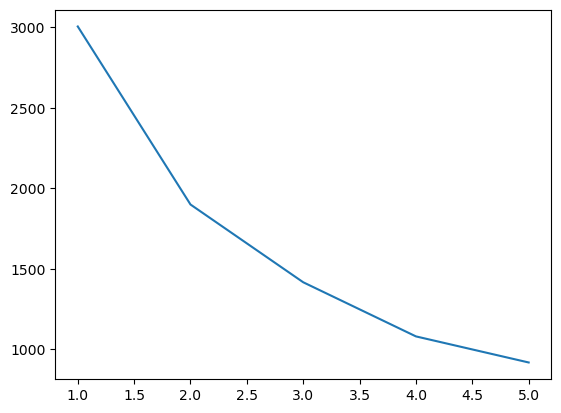

In [53]:
from sklearn.cluster import KMeans

# k 개수
x = []

# 응집도
y = []

for k in range(1, 6):
    k_means = KMeans(n_clusters=k, random_state=124)
    k_means.fit(pca_df)
    
    x.append(k)
    y.append(k_means.inertia_)
    
plt.plot(x, y)

In [21]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/

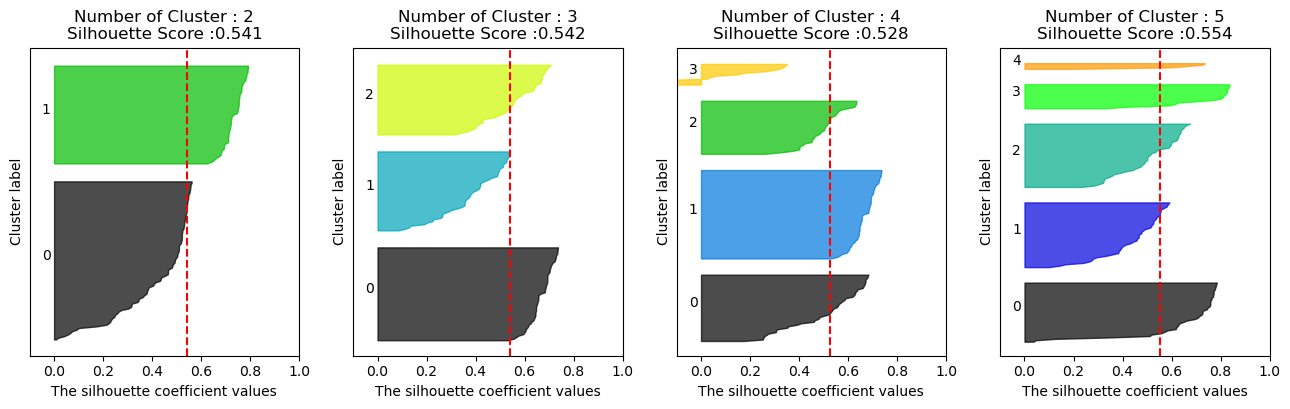

In [22]:
# 'Species' 열을 제외한 수치형 데이터 선택
X_features = fish_df.drop(['Species'], axis=1)

# 데이터 표준화
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

# 이후 visualize_silhouette 함수 호출
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

In [54]:
k_means = KMeans(n_clusters=3, random_state=124)
k_means.fit_predict(pca_df)
pca_df['cluster'] = k_means.labels_
pca_df

/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pca1,pca2,cluster
0,-0.452688,-0.564158,1
1,-0.108067,-0.658039,1
2,0.057986,-0.708710,1
3,0.341283,-0.483139,1
4,0.616239,-0.589666,1
...,...,...,...
1154,0.963857,-0.294977,0
1155,1.300716,0.401690,0
1156,0.132899,-0.965756,1
1157,1.610408,1.541600,0


<Axes: xlabel='pca1', ylabel='pca2'>

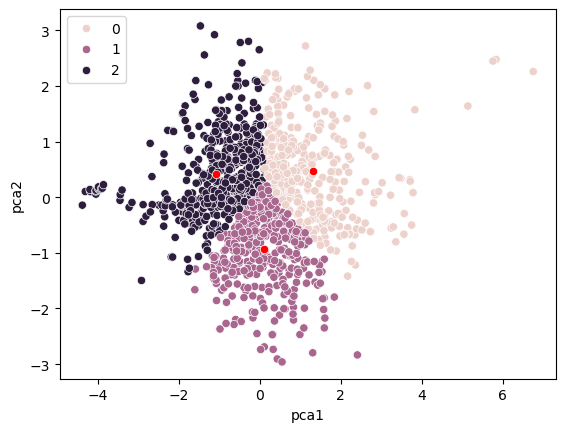

In [55]:
centroids = k_means.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df)
sns.scatterplot(x=centroids_x, y=centroids_y, color='red')

In [56]:
pca_df['Species'] = fish_df['Species']
# pca_df['Species'] = scaled_fish_df.Species
pca_df.groupby(by='cluster')['Species'].count()

cluster
0    333
1    374
2    452
Name: Species, dtype: int64

In [57]:
fish_df['cluster'] = pca_df.cluster
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width,cluster
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000,1
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600,1
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100,1
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500,1
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000,1
...,...,...,...,...,...,...,...,...
1154,Roach,537.551874,22.516935,36.898476,37.200493,15.748422,3.638007,0
1155,Perch,352.695899,35.261218,43.805681,21.891690,15.558469,5.494283,0
1156,Smelt,551.789099,36.884831,6.326354,38.047953,7.281541,5.394140,1
1157,Pike,773.045667,40.825037,39.951668,42.238640,8.335025,3.420791,0


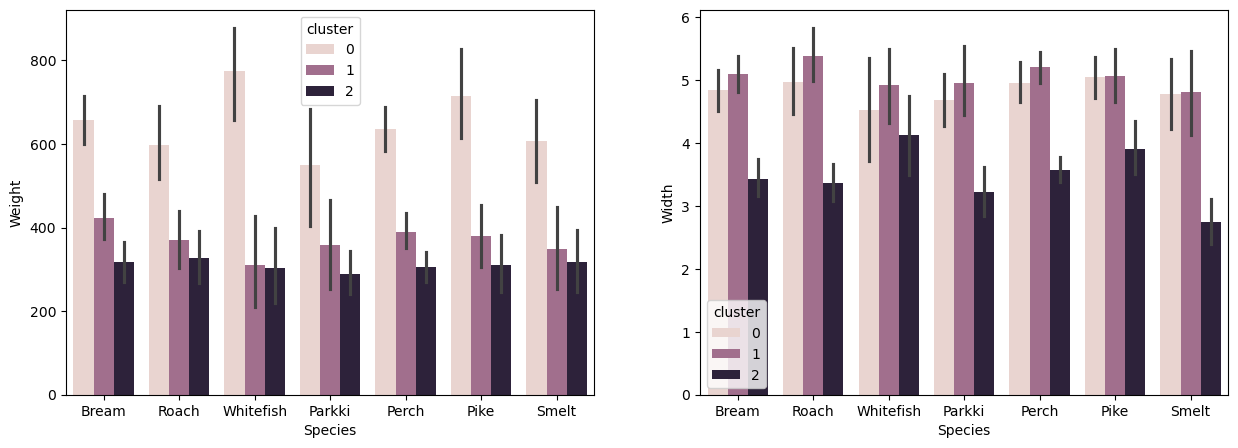

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# 귀하의 물고기 데이터에 맞는 데이터프레임을 사용해야 합니다.
# 여기서는 pca_df를 사용하겠습니다. 이 데이터프레임에 'cluster'라는 열이 있다고 가정합니다.

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Species', y='Weight', hue='cluster', data=fish_df, ax=ax[0])
sns.barplot(x='Species', y='Width', hue='cluster', data=fish_df, ax=ax[1])

plt.show()


In [59]:
fish_df[fish_df.cluster == 0].Species

12      Bream
14      Bream
15      Bream
16      Bream
17      Bream
        ...  
1152    Perch
1154    Roach
1155    Perch
1157     Pike
1158    Perch
Name: Species, Length: 333, dtype: object